In [1]:
import numpy as np
import pandas as pd

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning 
#from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
#from sklearn.impute import SimpleImputer
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score,plot_roc_curve
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
##from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from imblearn.over_sampling import RandomOverSampler
#import pickle
sns.set()
# Maths
import math
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)



In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# importing dataset 
df=pd.read_csv(r'C:\Users\FMC OWO\Downloads\DataLab Bird Strikes Intern\strike_reports.csv')

In [4]:
df.head(2)

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,ENROUTE_STATE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608274,15/10/1990,10,1990,NaN,Night,KMIE,DELAWARE COUNTY REGIONAL ARPT,40.24235,-85.39586,NaN,IN,AGL,NaN,PVT,PRIVATELY OWNED,NaN,NaN,C-172,226,7,7.0,10,A,1.0,A,1.0,7.0,NaN,NaN,NaN,Approach,200.0,70.0,NaN,No Cloud,None,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBS,Unknown bird - small,NO DAMAGE,False,False,No,1,1,Small,NaN,NaN,NaN,OPER = CHARLES WEATHERLY /Legacy Record=100033/,REDACTED,REDACTED,FAA Form 5200-7,Tower,04/12/1998,False
1,608275,01/08/1993,8,1993,NaN,Day,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,29.99339,-90.25803,1,LA,ASW,NaN,TWA,TRANS WORLD AIRLINES,NaN,NaN,B-727,148,94,34.0,10,A,4.0,D,3.0,5.0,6.0,5.0,NaN,Landing Roll,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,None,NaN,NaN,UNKBM,Unknown bird - medium,NO DAMAGE REPTD. TIME = 1850Z,False,False,Unknown,NaN,1,Medium,NaN,NaN,NaN,/Legacy Record=100034/,REDACTED,REDACTED,AC Incident Rept,Tower,24/05/2005,False


In [5]:
df1=df.head(100)

In [6]:
df.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE,AOS,BIRD_BAND_NUMBER,NR_INJURIES,NR_FATALITIES
count,2.559290e+05,255929.000000,255929.000000,224685.000000,224685.000000,168781.000000,184966.000000,184776.000000,184089.000000,171973.000000,12612.000000,3053.000000,135630.000000,87267.000000,164041.000000,12737.000000,5.400000e+01,258.000000,17.000000
mean,7.794279e+05,7.215993,2010.454759,36.893450,-91.643428,20.133451,3.519993,2.020906,2.873909,2.746262,2.944814,1.864723,861.456779,142.395407,0.785234,92.055033,1.612137e+08,1.298450,2.294118
std,1.445987e+05,2.773657,7.964454,6.859302,25.018537,10.858188,0.884457,0.425746,2.109520,1.993164,1.961035,1.366747,1840.524649,46.353512,3.527523,410.422686,6.521624e+07,0.774143,1.896204
min,6.082410e+05,1.000000,1990.000000,-37.673333,-177.381000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,6.770660e+05,5.000000,2005.000000,33.220630,-99.681900,10.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,0.000000,1.000000,1.357785e+08,1.000000,1.000000
50%,7.415810e+05,8.000000,2012.000000,38.805810,-87.904460,22.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,50.000000,139.000000,0.000000,3.000000,1.893115e+08,1.000000,2.000000
75%,8.086660e+05,9.000000,2017.000000,40.850970,-80.417940,31.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000,800.000000,160.000000,0.000000,24.000000,1.947486e+08,1.000000,3.000000
max,1.163542e+06,12.000000,2021.000000,71.285450,178.559228,92.000000,5.000000,4.000000,7.000000,7.000000,6.000000,5.000000,31300.000000,1250.000000,99.000000,10080.000000,2.791613e+08,7.000000,8.000000


In [7]:
de=pd.read_csv(r'C:\Users\FMC OWO\Downloads\DataLab Bird Strikes Intern\column_description.csv')
de

,Column Name,Explanation of Column Name and Codes
0,NaN,NaN
1,INDEX NR,Individual record number
2,OPID,Airline operator code
3,OPERATOR,A three letter International Civil Aviation Or...
4,ATYPE,Aircraft
5,AMA,International Civil Aviation Organization code...
6,AMO,International Civil Aviation Organization code...
7,EMA,Engine Make Code (see Engine Codes tab below)
8,EMO,Engine Model Code (see Engine Codes tab below)
9,AC_CLASS,Type of aircraft (see Aircraft Type tab below)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255929 entries, 0 to 255928
Data columns (total 100 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   INDEX_NR               255929 non-null  int64  
 1   INCIDENT_DATE          255929 non-null  object 
 2   INCIDENT_MONTH         255929 non-null  int64  
 3   INCIDENT_YEAR          255929 non-null  int64  
 4   TIME                   134887 non-null  object 
 5   TIME_OF_DAY            149502 non-null  object 
 6   AIRPORT_ID             255929 non-null  object 
 7   AIRPORT                255929 non-null  object 
 8   LATITUDE               224685 non-null  float64
 9   LONGITUDE              224685 non-null  float64
 10  RUNWAY                 193572 non-null  object 
 11  STATE                  224685 non-null  object 
 12  FAAREGION              224685 non-null  object 
 13  LOCATION               29779 non-null   object 
 14  OPID                   255920 non-n

# HANDLING MISSING VALUES 

In [9]:
df.isnull().sum()

INDEX_NR                      0
INCIDENT_DATE                 0
INCIDENT_MONTH                0
INCIDENT_YEAR                 0
TIME                     121042
TIME_OF_DAY              106427
AIRPORT_ID                    0
AIRPORT                       0
LATITUDE                  31244
LONGITUDE                 31244
RUNWAY                    62357
STATE                     31244
FAAREGION                 31244
LOCATION                 226150
OPID                          9
OPERATOR                      0
REG                      103832
FLT                      144439
AIRCRAFT                      0
AMA                       71654
AMO                       82503
EMA                       87148
EMO                       90368
AC_CLASS                  70465
AC_MASS                   70963
TYPE_ENG                  71383
NUM_ENGS                  71153
ENG_1_POS                 71840
ENG_2_POS                 83956
ENG_3_POS                243317
ENG_4_POS                252876
PHASE_OF

In [10]:
round(100*(df.isnull().sum()/len(df.index)),2)



INDEX_NR                  0.00
INCIDENT_DATE             0.00
INCIDENT_MONTH            0.00
INCIDENT_YEAR             0.00
TIME                     47.30
TIME_OF_DAY              41.58
AIRPORT_ID                0.00
AIRPORT                   0.00
LATITUDE                 12.21
LONGITUDE                12.21
RUNWAY                   24.36
STATE                    12.21
FAAREGION                12.21
LOCATION                 88.36
OPID                      0.00
OPERATOR                  0.00
REG                      40.57
FLT                      56.44
AIRCRAFT                  0.00
AMA                      28.00
AMO                      32.24
EMA                      34.05
EMO                      35.31
AC_CLASS                 27.53
AC_MASS                  27.73
TYPE_ENG                 27.89
NUM_ENGS                 27.80
ENG_1_POS                28.07
ENG_2_POS                32.80
ENG_3_POS                95.07
ENG_4_POS                98.81
PHASE_OF_FLIGHT          37.54
HEIGHT  

In [11]:
# Handling missing values 
for i in df.columns:
    if df[i].dtype=='O':
        print(i,'has',len(df[i].unique()),'categories')

INCIDENT_DATE has 11567 categories
TIME has 1481 categories
TIME_OF_DAY has 5 categories
AIRPORT_ID has 2492 categories
AIRPORT has 2492 categories
RUNWAY has 874 categories
STATE has 64 categories
FAAREGION has 11 categories
LOCATION has 8430 categories
OPID has 593 categories
OPERATOR has 590 categories
REG has 39301 categories
FLT has 10598 categories
AIRCRAFT has 586 categories
AMA has 97 categories
AMO has 120 categories
EMO has 103 categories
AC_CLASS has 6 categories
TYPE_ENG has 8 categories
PHASE_OF_FLIGHT has 13 categories
SKY has 4 categories
PRECIPITATION has 13 categories
COST_REPAIRS has 1274 categories
COST_OTHER has 627 categories
COST_REPAIRS_INFL_ADJ has 2804 categories
COST_OTHER_INFL_ADJ has 1530 categories
DAMAGE_LEVEL has 6 categories
OTHER_SPECIFY has 2675 categories
EFFECT has 12 categories
EFFECT_OTHER has 899 categories
SPECIES_ID has 840 categories
SPECIES has 841 categories
REMARKS has 210491 categories
WARNED has 3 categories
NUM_SEEN has 5 categories
NUM_S

# Dropping Columns 

In [12]:
#These columns were dropped because the contained more than 60% mising values 
df.drop(['NR_FATALITIES','NR_INJURIES','ENROUTE_STATE','BIRD_BAND_NUMBER','EFFECT_OTHER',
         'OTHER_SPECIFY','COST_REPAIRS','AOS','COST_OTHER',
         'COST_REPAIRS_INFL_ADJ','COST_OTHER_INFL_ADJ'],axis=1,inplace=True)

In [13]:
# these columns were dropped because they contained more than 60% missing values and there were other columns 
#/vectors that could be used to deduce them e.g speed=distance/time,location is a function of longitude and latitude 
df.drop(['LOCATION','SPEED'],axis=1,inplace=True)

In [14]:
# these columns were dropped due to having more than 50% missing values
df.drop(['NUM_SEEN','FLT'],axis=1,inplace=True)

In [15]:
round(100*(df.isnull().sum()/len(df.index)),2)

INDEX_NR              0.00
INCIDENT_DATE         0.00
INCIDENT_MONTH        0.00
INCIDENT_YEAR         0.00
TIME                 47.30
TIME_OF_DAY          41.58
AIRPORT_ID            0.00
AIRPORT               0.00
LATITUDE             12.21
LONGITUDE            12.21
RUNWAY               24.36
STATE                12.21
FAAREGION            12.21
OPID                  0.00
OPERATOR              0.00
REG                  40.57
AIRCRAFT              0.00
AMA                  28.00
AMO                  32.24
EMA                  34.05
EMO                  35.31
AC_CLASS             27.53
AC_MASS              27.73
TYPE_ENG             27.89
NUM_ENGS             27.80
ENG_1_POS            28.07
ENG_2_POS            32.80
ENG_3_POS            95.07
ENG_4_POS            98.81
PHASE_OF_FLIGHT      37.54
HEIGHT               47.00
DISTANCE             35.90
SKY                  50.42
PRECIPITATION        52.17
INGESTED              0.00
INDICATED_DAMAGE      0.00
DAMAGE_LEVEL         34.08
S

# Filling in missing values 

In [16]:
# LONGITUDE AND LATITUDE 
df[['LATITUDE','LONGITUDE']].describe()


,LATITUDE,LONGITUDE
count,224685.000000,224685.000000
mean,36.893450,-91.643428
std,6.859302,25.018537
min,-37.673333,-177.381000
25%,33.220630,-99.681900
50%,38.805810,-87.904460
75%,40.850970,-80.417940
max,71.285450,178.559228


<Figure size 2160x2160 with 0 Axes>

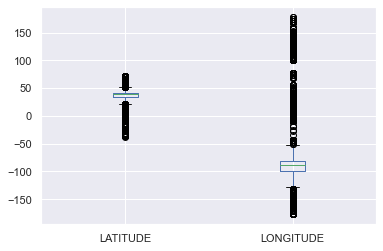

In [17]:
#Box plot to check for skewnes of the data
plt.figure(figsize=(30,30))
df[['LATITUDE','LONGITUDE']].plot.box()

In [18]:
# given the skewdness of the data id consider replacing the missing values with the median 
df[['LATITUDE','LONGITUDE']].median()

LATITUDE     38.80581
LONGITUDE   -87.90446
dtype: float64

In [19]:
 
df['LATITUDE']=df['LATITUDE'].fillna(df['LATITUDE'].mode()[0])

In [20]:
df['LATITUDE'].mode()[0]

39.85841

In [21]:
##x=df[df['LATITUDE']==df['LATITUDE'].mode()[0]]
#x

In [22]:
df['LONGITUDE'].fillna(-104.667, inplace=True)

In [23]:
# HEIGHT 
df['HEIGHT'].describe()

count    135630.000000
mean        861.456779
std        1840.524649
min           0.000000
25%           0.000000
50%          50.000000
75%         800.000000
max       31300.000000
Name: HEIGHT, dtype: float64

In [24]:
#The distance between the mean and std sugests a skewed data hence id be filling the missing values with the median 
df['HEIGHT']=df['HEIGHT'].fillna(df['HEIGHT'].median())

In [25]:
#DISTANCE
df['DISTANCE'].describe()


count    164041.000000
mean          0.785234
std           3.527523
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          99.000000
Name: DISTANCE, dtype: float64

In [26]:
df['DISTANCE']=df['DISTANCE'].fillna(df['DISTANCE'].mode()[0])


In [27]:
len(df['DISTANCE'].isnull())

255929

In [28]:
# ENG_POS 1&2
df[['ENG_1_POS','ENG_2_POS']].describe()

,ENG_1_POS,ENG_2_POS
count,184089.000000,171973.000000
mean,2.873909,2.746262
std,2.109520,1.993164
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,5.000000,5.000000
max,7.000000,7.000000


In [29]:
df['ENG_1_POS']=df['ENG_1_POS'].fillna(df['ENG_1_POS'].mean())

In [30]:
df['ENG_2_POS']=df['ENG_2_POS'].fillna(df['ENG_2_POS'].mean())

In [31]:
df['ENG_3_POS'].fillna(-1, inplace=True)



In [32]:
df['ENG_4_POS'].fillna(-1, inplace=True)

In [33]:
# NUM_ENGS
df['NUM_ENGS'].describe()

count    184776.000000
mean          2.020906
std           0.425746
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: NUM_ENGS, dtype: float64

In [34]:
df['NUM_ENGS']=df['NUM_ENGS'].fillna(df['NUM_ENGS'].mean())

In [35]:
# SIZE 
df['SIZE'].unique()


array(['Small', 'Medium', 'Large', nan], dtype=object)

In [36]:
df['SIZE'].mode()

0    Small
dtype: object

In [37]:
#Since size is a categorical data with only 3 categories id opt to fill ity with the mode 
df['SIZE']=df['SIZE'].fillna(df['SIZE'].mode()[0])

In [38]:
#PHASE_OF_FLIGHT 
df['PHASE_OF_FLIGHT'].unique()

array(['Approach', 'Landing Roll', 'Climb', 'En Route', 'Take-off Run',
       nan, 'Taxi', 'Descent', 'Parked', 'Local', 'Arrival', 'Departure',
       'Unknown'], dtype=object)

In [39]:
df['PHASE_OF_FLIGHT']=df['PHASE_OF_FLIGHT'].fillna(df['PHASE_OF_FLIGHT'].mode()[0])

In [40]:
#DAMAGE_LEVEL
df['DAMAGE_LEVEL'].unique()



array(['N', 'S', 'M', nan, 'M?', 'D'], dtype=object)

In [41]:
df['DAMAGE_LEVEL'].unique()

array(['N', 'S', 'M', nan, 'M?', 'D'], dtype=object)

In [42]:
df['DAMAGE_LEVEL'].mode()

0    N
dtype: object

In [43]:
df['DAMAGE_LEVEL']=df['DAMAGE_LEVEL'].fillna(df['DAMAGE_LEVEL'].mode()[0])

In [44]:
# TYPE_ENG
df['TYPE_ENG'].unique()

array(['A', 'D', 'C', nan, 'F', 'B', 'Y', 'E'], dtype=object)

In [45]:
#AC_CLASS
df['AC_CLASS'].unique()

array(['A', nan, 'B', 'J', 'C', 'Y'], dtype=object)

In [46]:
df['AC_CLASS'].mode()

0    A
dtype: object

In [47]:
df['AC_CLASS']=df['AC_CLASS'].fillna(df['AC_CLASS'].mode()[0])

In [48]:
#AC_MASS
df['AC_MASS'].unique()

array([ 1.,  4.,  2.,  3., nan,  5.])

In [49]:
df['AC_MASS'].mode()

0    4.0
dtype: float64

In [50]:
df['AC_MASS']=df['AC_MASS'].fillna(df['AC_MASS'].mode()[0])

In [51]:
# AMO
df['AMO'].unique()

array(['7', '94', '26', '6', '37', '21', '33', '13', '95', '10', '34',
       '8', '5', '4', '1', '90', nan, '91', '24', '18', '22', '39', '15',
       '3', '14', '23', '12', '27', '11', '36', '40', '30', '32', '17',
       '9', '98', '20', '19', '25', '38', '31', '2', '35', '29', '97',
       '16', '45', '42', '96', '41', '46', '451', 'E2', '43', '49', 22.0,
       90.0, 24.0, 95.0, 13.0, 11.0, 26.0, 37.0, 5.0, 38.0, 91.0, 40.0,
       10.0, 30.0, 21.0, 23.0, 3.0, 25.0, 12.0, 94.0, 36.0, 4.0, 8.0,
       97.0, 35.0, 27.0, 33.0, 18.0, 42.0, 1.0, 7.0, 2.0, 32.0, 19.0, 6.0,
       34.0, 16.0, 39.0, 14.0, 20.0, 96.0, 15.0, 98.0, 45.0, 29.0, 9.0,
       41.0, 31.0, 89.0, 49.0, 17.0, 43.0, 28.0, 0.0, 44.0, 48.0, 47.0,
       46.0, 93.0, '44', 'N33', '48', '47', '0', 'N16'], dtype=object)

In [52]:
df['AMO'].mode()

0    42
dtype: object

In [53]:
df['AMO']=df['AMO'].fillna(df['AMO'].mode()[0])

In [54]:
# AMA
df['AMA'].unique()

array(['226', '148', '123', '583', '729', '804', '778', '372', '627', nan,
       '561', '303', '915', '04A', '97', '168', '332', '813', '316',
       '279', '128', '443', '503', '300', '659', '421', '395', '765',
       '169', '188', '31', '417', '345', '632', '228', '998', '894',
       '271', '478', '418', '975', '130', '612', '842', '762', '547',
       'HEL', '672', '603', '34', '172', '36', '337', '755', '667', '30',
       '41', '918', '70', '700', '19', '33A', '972', '730', '726', '100',
       '764', '232', '275', '79', '830', '748', '706', '405', '721',
       '584', '775', '61', '334', '286', '132', '452', '107', '04a',
       '900', '348', '14', '105', '43', '46', '665', '229', '789', '04B',
       '41F', '167', 'Q'], dtype=object)

In [55]:
df['AMA'].mode()

0    148
dtype: object

In [56]:
df['AMA']=df['AMA'].fillna(df['AMA'].mode()[0])

In [57]:
# EMA
df['EMA'].unique()

array([ 7., 34., 13., 10., nan, 31., 22., 37., 19., 23.,  1., 44., 43.,
       11.,  2., 16.,  9., 46., 29., 20., 92.,  3., 18., 25., 35., 45.,
       36., 33., 32., 41., 24., 14., 47., 30., 27.,  0., 12., 42.])

In [58]:
df['EMA'].mode()

0    10.0
dtype: float64

In [59]:
df['EMA']=df['EMA'].fillna(df['EMA'].mode()[0])

In [60]:
# EMO
df['EMO'].unique()

array(['10', '40', '16', '1', nan, '13', '31', '4', '22', '43', '7', '37',
       '46', '34', '19', '52', '20', '14', 'N1', '28', '62', 'Y', 4.0,
       10.0, 1.0, 37.0, 25.0, 19.0, 31.0, 46.0, 7.0, 22.0, 43.0, 16.0,
       13.0, 40.0, 20.0, 32.0, 52.0, 6.0, 14.0, 34.0, 8.0, '25', '21',
       '??', '8', '30', '6', '41', '55', '3', '97', 55.0, 3.0, 12.0, 41.0,
       2.0, 36.0, '35', 'n3', '36', 'O1', '2', '42', 'N4', '50', 62.0,
       38.0, 50.0, 35.0, 91.0, 'N6', '0', 'N9', 'n7', '49', 30.0, 56.0,
       0.0, 23.0, 28.0, 48.0, 9.0, 49.0, 18.0, '61', '57', 'N5', '12',
       'N7', '91', 'KD', 'KO', 'G-', 'N3', 'KP', '?', '27', '5', '47',
       0.4, 21.0], dtype=object)

In [61]:
df['EMO'].mode()

0    1
dtype: object

In [62]:
df['EMO']=df['EMO'].fillna(df['EMO'].mode()[0])

In [63]:
# RUNWAY
len(df['RUNWAY'].unique())
# given the high number of unique values in gthis column id consider dropping the rows with missing values 

874

In [64]:
#REG
df['REG'].unique()

array([nan, 'N19CT', 'N887AA', ..., 'N4401E', 'N29QA', 'N607RR'],
      dtype=object)

In [65]:
df['REG'].mode()

0    N477HA
dtype: object

In [66]:
df['REG']=df['REG'].fillna(df['REG'].mode()[0])

In [67]:
df['EFFECT'].unique()

array([nan, 'None', 'Precautionary Landing', 'Aborted Take-off', 'Other',
       'Engine Shutdown', 'Other, Precautionary Landing',
       'Engine Shutdown, Precautionary Landing',
       'Aborted Take-off, Engine Shutdown',
       'Aborted Take-off, Precautionary Landing',
       'None, Precautionary Landing',
       'Aborted Take-off, Engine Shutdown, Other'], dtype=object)

In [68]:
df['EFFECT'].mode()

0    None
dtype: object

In [69]:
df['EFFECT']=df['EFFECT'].fillna(df['EFFECT'].mode()[0])

In [70]:
# TYPE ENG
df['TYPE_ENG'].unique()

array(['A', 'D', 'C', nan, 'F', 'B', 'Y', 'E'], dtype=object)

In [71]:
df['TYPE_ENG']= df['TYPE_ENG'].fillna(df['TYPE_ENG'].mode()[0])

# Dropping rows with missing values acrosss specific columns

In [72]:
round(100*(df.isnull().sum()/len(df.index)),2)

INDEX_NR              0.00
INCIDENT_DATE         0.00
INCIDENT_MONTH        0.00
INCIDENT_YEAR         0.00
TIME                 47.30
TIME_OF_DAY          41.58
AIRPORT_ID            0.00
AIRPORT               0.00
LATITUDE              0.00
LONGITUDE             0.00
RUNWAY               24.36
STATE                12.21
FAAREGION            12.21
OPID                  0.00
OPERATOR              0.00
REG                   0.00
AIRCRAFT              0.00
AMA                   0.00
AMO                   0.00
EMA                   0.00
EMO                   0.00
AC_CLASS              0.00
AC_MASS               0.00
TYPE_ENG              0.00
NUM_ENGS              0.00
ENG_1_POS             0.00
ENG_2_POS             0.00
ENG_3_POS             0.00
ENG_4_POS             0.00
PHASE_OF_FLIGHT       0.00
HEIGHT                0.00
DISTANCE              0.00
SKY                  50.42
PRECIPITATION        52.17
INGESTED              0.00
INDICATED_DAMAGE      0.00
DAMAGE_LEVEL          0.00
S

In [73]:
# remove rows with missing values for the columns addressed below 
df= df.dropna(subset=['PERSON', 'STATE','COMMENTS','REMARKS','NUM_STRUCK'
                      ,'FAAREGION','RUNWAY'])

In [74]:
round(100*(df.isnull().sum()/len(df.index)),2)

INDEX_NR              0.00
INCIDENT_DATE         0.00
INCIDENT_MONTH        0.00
INCIDENT_YEAR         0.00
TIME                 46.69
TIME_OF_DAY          39.25
AIRPORT_ID            0.00
AIRPORT               0.00
LATITUDE              0.00
LONGITUDE             0.00
RUNWAY                0.00
STATE                 0.00
FAAREGION             0.00
OPID                  0.00
OPERATOR              0.00
REG                   0.00
AIRCRAFT              0.00
AMA                   0.00
AMO                   0.00
EMA                   0.00
EMO                   0.00
AC_CLASS              0.00
AC_MASS               0.00
TYPE_ENG              0.00
NUM_ENGS              0.00
ENG_1_POS             0.00
ENG_2_POS             0.00
ENG_3_POS             0.00
ENG_4_POS             0.00
PHASE_OF_FLIGHT       0.00
HEIGHT                0.00
DISTANCE              0.00
SKY                  49.12
PRECIPITATION        50.53
INGESTED              0.00
INDICATED_DAMAGE      0.00
DAMAGE_LEVEL          0.00
S

# WEATHER RELATED COLUMNS

In [75]:
df['SKY'].unique()

array([nan, 'No Cloud', 'Some Cloud', 'Overcast'], dtype=object)

In [76]:
df['PRECIPITATION'].unique()



array([nan, 'None', 'Fog', 'Rain', 'Snow', 'Fog, Rain', 'Fog, Snow',
       'Fog, Rain, Snow', 'Rain, Snow', 'None, Snow', 'None, Rain'],
      dtype=object)

In [77]:
df['PRECIPITATION']=df['PRECIPITATION'].replace('None, Snow','Snow')

In [78]:
df['PRECIPITATION']=df['PRECIPITATION'].replace('None, Rain','Rain')

In [79]:
df['PRECIPITATION'].unique()

array([nan, 'None', 'Fog', 'Rain', 'Snow', 'Fog, Rain', 'Fog, Snow',
       'Fog, Rain, Snow', 'Rain, Snow'], dtype=object)

In [80]:
#df1=df[df['PRECIPITATION']=='Rain']

In [81]:
#df1.SKY.unique()

In [82]:
df['PRECIPITATION'].mode()

0    None
dtype: object

In [83]:
df['PRECIPITATION']=df['PRECIPITATION'].fillna(df['PRECIPITATION'].mode()[0])

In [84]:
pd.pivot_table(df,columns='PRECIPITATION', index=['SKY'],aggfunc=np.count_nonzero)

AC_CLASS                                                       \
PRECIPITATION      Fog Fog, Rain Fog, Rain, Snow Fog, Snow     None    Rain   
SKY                                                                           
No Cloud          89.0       NaN             NaN       NaN  32158.0    35.0   
Overcast         965.0     169.0             4.0       9.0   7790.0  3431.0   
Some Cloud       220.0       9.0             NaN       NaN  23459.0   677.0   

                                AC_MASS                                      \
PRECIPITATION Rain, Snow   Snow     Fog Fog, Rain Fog, Rain, Snow Fog, Snow   
SKY                                                                           
No Cloud             NaN   16.0    89.0       NaN             NaN       NaN   
Overcast            12.0  188.0   965.0     169.0             4.0       9.0   
Some Cloud           NaN   31.0   220.0       9.0             NaN       NaN   

                                                 AIRCRAFT            \
PRECIPITATION     None    Rain Rain, Snow   Snow      Fog Fog, Rain   
SKY                                                                   
No Cloud       32158.0    35.0        NaN   16.0     89.0       NaN   
Overcast        7790.0  3431.0       12.0  188.0    965.0     169.0   
Some Cloud     23459.0   677.0        NaN   31.0    220.0       9.0   

                                                                            \
PRECIPITATION Fog, Rain, Snow Fog, Snow     None    Rain Rain, Snow   Snow   
SKY                                                                          
No Cloud                  NaN       NaN  32158.0    35.0        NaN   16.0   
Overcast                  4.0       9.0   7790.0  3431.0       12.0  188.0   
Some Cloud                NaN       NaN  23459.0   677.0        NaN   31.0   

              AIRPORT                                                       \
PRECIPITATION     Fog Fog, Rain Fog, Rain, Snow Fog, Snow     None    Rain   
SKY                                                                          
No Cloud         89.0       NaN             NaN       NaN  32158.0    35.0   
Overcast        965.0     169.0             4.0       9.0   7790.0  3431.0   
Some Cloud      220.0       9.0             NaN       NaN  23459.0   677.0   

                                AIRPORT_ID                            \
PRECIPITATION Rain, Snow   Snow        Fog Fog, Rain Fog, Rain, Snow   
SKY                                                                    
No Cloud             NaN   16.0       89.0       NaN             NaN   
Overcast            12.0  188.0      965.0     169.0             4.0   
Some Cloud           NaN   31.0      220.0       9.0             NaN   

                                                              AMA            \
PRECIPITATION Fog, Snow     None    Rain Rain, Snow   Snow    Fog Fog, Rain   
SKY                                                                           
No Cloud            NaN  32158.0    35.0        NaN   16.0   89.0       NaN   
Overcast            9.0   7790.0  3431.0       12.0  188.0  965.0     169.0   
Some Cloud          NaN  23459.0   677.0        NaN   31.0  220.0       9.0   

                                                                            \
PRECIPITATION Fog, Rain, Snow Fog, Snow     None    Rain Rain, Snow   Snow   
SKY                                                                          
No Cloud                  NaN       NaN  32158.0    35.0        NaN   16.0   
Overcast                  4.0       9.0   7790.0  3431.0       12.0  188.0   
Some Cloud                NaN       NaN  23459.0   677.0        NaN   31.0   

                 AMO                                                       \
PRECIPITATION    Fog Fog, Rain Fog, Rain, Snow Fog, Snow     None    Rain   
SKY                                                                         
No Cloud        89.0       NaN             NaN       NaN  32130.0    35.0   
Overcast      

In [85]:
# filling in the Sky columns with mode 
#for i in df.columns:
    #if 'PRECIPITATION'=='Fog, Rain':
        #df['SKY']='Overcast'
    #elif 'PRECIPITATION'=='Fog':
        #df['SKY']='Overcast'
    #elif 'PRECIPITATION'=='Fog, Rain, Snow':
        #df['SKY']='Overcast'
    #elif 'PRECIPITATION'=='Fog, Snow':
        #df['SKY']='Overcast'  
    #elif 'PRECIPITATION'=='None':
        #df['SKY']='No Cloud'
    #elif 'PRECIPITATION'=='Rain':
        #df['SKY']='Overcast' 
    #elif 'PRECIPITATION'=='Rain, Snow':
        #df['SKY']='Overcast'  
    #else:
        #df['SKY']='Overcast'
     
    
df['SKY']=df['SKY'].fillna(df['SKY'].mode()[0])   

In [86]:
df['SKY'].unique()

array(['No Cloud', 'Some Cloud', 'Overcast'], dtype=object)

# HANDLING THE TIME COLUMNS

In [87]:
df['TIME'].unique()

array([nan, '08:08', '18:00', ..., '%07:4', '%06:4', '02:38'],
      dtype=object)

In [88]:
df['TIME']=df['TIME'].str.replace('%',' ')

In [89]:
df['TIME'].unique()

array([nan, '08:08', '18:00', ..., ' 07:4', ' 06:4', '02:38'],
      dtype=object)

In [90]:
from datetime import time

In [91]:
df['TIME_OF_DAY'].unique()

array(['Day', nan, 'Night', 'Dawn', 'Dusk'], dtype=object)

In [92]:
df['TIME']=df['TIME'].bfill


In [93]:
df['TIME_OF_DAY']=df['TIME_OF_DAY'].fillna(df['TIME_OF_DAY'].mode()[0])

In [94]:
round(100*(df.isnull().sum()/len(df.index)),2)

INDEX_NR             0.0
INCIDENT_DATE        0.0
INCIDENT_MONTH       0.0
INCIDENT_YEAR        0.0
TIME                 0.0
TIME_OF_DAY          0.0
AIRPORT_ID           0.0
AIRPORT              0.0
LATITUDE             0.0
LONGITUDE            0.0
RUNWAY               0.0
STATE                0.0
FAAREGION            0.0
OPID                 0.0
OPERATOR             0.0
REG                  0.0
AIRCRAFT             0.0
AMA                  0.0
AMO                  0.0
EMA                  0.0
EMO                  0.0
AC_CLASS             0.0
AC_MASS              0.0
TYPE_ENG             0.0
NUM_ENGS             0.0
ENG_1_POS            0.0
ENG_2_POS            0.0
ENG_3_POS            0.0
ENG_4_POS            0.0
PHASE_OF_FLIGHT      0.0
HEIGHT               0.0
DISTANCE             0.0
SKY                  0.0
PRECIPITATION        0.0
INGESTED             0.0
INDICATED_DAMAGE     0.0
DAMAGE_LEVEL         0.0
STR_RAD              0.0
DAM_RAD              0.0
STR_WINDSHLD         0.0


# USING DOMAIN KNOWLEDGE TO FURTHER DROP COLUMNS 

In [95]:
df.shape

(136131, 85)

A critical observation of the columns based on their relevance suggests that a few more columns be dropped on the basis of their relevance to the target (INDICATED DAMAGE) 

In [96]:
df['INDICATED_DAMAGE'].unique()

array([False,  True])

In [97]:
df.drop([ 'REMARKS','AIRPORT_ID', 'RUNWAY','STATE','OPID','LUPDATE','TRANSFER',
         'REPORTED_NAME','REPORTED_TITLE','SPECIES_ID','AMA','AMO','EMA','EMO'],axis=1,inplace=True)

In [98]:
df.drop(['COMMENTS'], axis=1,inplace=True)

In [99]:
df.shape

(136131, 70)

# CORRECTING DATA TYPES 



In [100]:
df.dtypes

INDEX_NR               int64
INCIDENT_DATE         object
INCIDENT_MONTH         int64
INCIDENT_YEAR          int64
TIME                  object
TIME_OF_DAY           object
AIRPORT               object
LATITUDE             float64
LONGITUDE            float64
FAAREGION             object
OPERATOR              object
REG                   object
AIRCRAFT              object
AC_CLASS              object
AC_MASS              float64
TYPE_ENG              object
NUM_ENGS             float64
ENG_1_POS            float64
ENG_2_POS            float64
ENG_3_POS            float64
ENG_4_POS            float64
PHASE_OF_FLIGHT       object
HEIGHT               float64
DISTANCE             float64
SKY                   object
PRECIPITATION         object
INGESTED                bool
INDICATED_DAMAGE        bool
DAMAGE_LEVEL          object
STR_RAD                 bool
DAM_RAD                 bool
STR_WINDSHLD            bool
DAM_WINDSHLD            bool
STR_NOSE                bool
DAM_NOSE      

In [101]:
df['INCIDENT_DATE']=pd.to_datetime(df['INCIDENT_DATE'])

In [102]:
df['SPECIES'].unique()

array(['Unknown bird - medium', 'Blackbirds', 'Unknown bird - large',
       'Unknown bird - small', 'European starling', 'Gulls', 'Sparrows',
       'Laughing gull', 'Hawks', 'Mourning dove', 'Canada goose',
       'Terns, Noddies', 'White-tailed deer', 'Yellow-billed magpie',
       'Rock pigeon', 'Ducks', 'Turkey vulture', 'Red-tailed hawk',
       'Swallows', 'Purple martin', 'Doves', 'Killdeer', 'Osprey',
       'Egrets', 'American kestrel', 'Great blue heron', 'Owls',
       'Northern rough-winged swallow', 'American crow', 'Crows',
       'Hooded merganser', 'Snow goose', 'Thrushes', 'Herring gull',
       'Tree swallow', 'American robin', 'Western meadowlark', 'Mallard',
       'Sandpipers, curlews, phalaropes, allies', 'Ring-billed gull',
       'Blue-winged teal', 'Ring-necked pheasant', 'Snowy egret',
       'Chimney swift', 'Geese', 'Snow bunting', 'Ducks, geese, swans',
       'Barn swallow', 'Brown pelican', 'Peregrine falcon',
       'Eastern meadowlark', 'Herons', 'Micr

In [103]:
df['INCIDENT_MONTH']=df['INCIDENT_MONTH'].astype(int)

# FEATURE ENGINEERING

SEASON feature was engineered for better analysis of birds migratory patterns

In [104]:
df['SEASONS']=0

In [105]:
for i in list(range(6,9)):
    df.loc[df.INCIDENT_MONTH==i,'SEASONS'] ='Summer'
for i in list(range(9,12)):
    df.loc[df.INCIDENT_MONTH==i,'SEASONS'] ='Fall' 
for i in list(range(3,6)):
    df.loc[df.INCIDENT_MONTH==i,'SEASONS'] ='Spring'   
for i in list(range(1,3)):
    df.loc[df.INCIDENT_MONTH==i,'SEASONS'] ='Winter'  
    
    
df.loc[df.INCIDENT_MONTH==12,'SEASONS'] ='Winter'

'RISK' column was created on the relationship between the 'WARNED' and 'EFFECT' column to accertain the level of risk associated with each incident.

In [106]:
df['RISK']=0


def risks(bs):
    if (bs['WARNED']=='Yes') & (bs['EFFECT']!='None'):
        return 'High Risk'
    if (bs['WARNED']=='Yes') & (bs['EFFECT']=='None'):
        return 'Potential Risk' 
    if (bs['WARNED']=='No') & (bs['EFFECT']!='None'):
        return 'High Risk' 
    if (bs['WARNED']=='No') & (bs['EFFECT']=='None'):
        return 'Low Risk'   
    if (bs['WARNED']=='Unknown') & (bs['EFFECT']!='None'):
        return 'High Risk'  
    if (bs['WARNED']=='Unknown') & (bs['EFFECT']=='None'):
        return 'Undetermined'                              

In [107]:
df['RISK']=df.apply(risks,axis=1)

# EXPLORATORY DATA ANALYSIS

In [108]:
# IMPORT NECCESARY LIBARIES 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from collections import Counter

## CREATING A PIE CHART SHOWING THE UNIQUE VALUES OF INDICATED DAMAGE 


In [109]:
df.INDICATED_DAMAGE.value_counts()

False    127622
True       8509
Name: INDICATED_DAMAGE, dtype: int64

In [110]:
No= (df['INDICATED_DAMAGE']==False).sum()
Yes= (df['INDICATED_DAMAGE']==True).sum()




In [111]:
No

127622

In [112]:
proportions = [Yes,No]

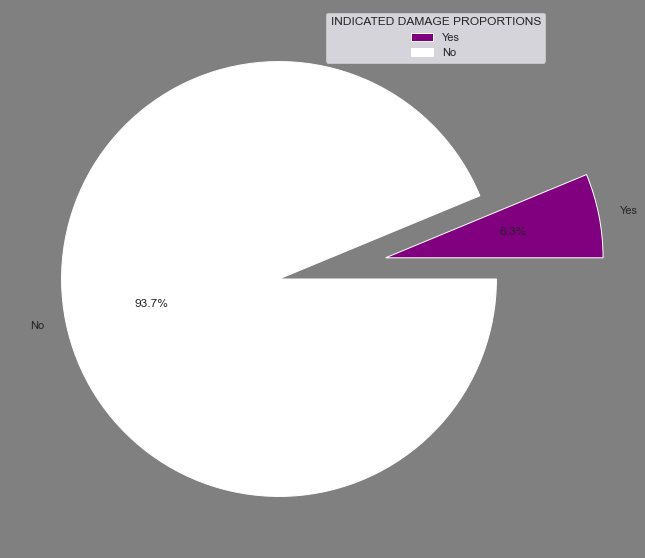

In [113]:
plt.figure(figsize=(10,10),facecolor='grey')
plt.pie(proportions, explode=[0.5,0], shadow=False, colors=['purple','white'],
       autopct='%1.1f%%', labels=['Yes','No'])
plt.legend(title='INDICATED DAMAGE PROPORTIONS')
plt.show()          

This pie chart suggets that there is more cases without inicated damage than those with indicated damage, it also hints at a need to balance the date set in machine learning stage

## Barchart to show strikes across years, months and time of day

In [114]:
# Analysing the Strikes Per Year
Strikes_per_year=Counter(df['INCIDENT_YEAR'])
Years=(list(Strikes_per_year.keys()))
Ystrikes=list(Strikes_per_year.values())

In [115]:
#plt.figure(figsize=(10,10))
#plt.plot(Years,Ystrikes,c='r',alpha = 1,lw =2.1,ls='--', marker ='o',ms=5)
#plt.xlabel('Years')
#plt.ylabel('Ystrikes')
#plt.title('STRIKES OVER YEARS CHART')
#plt.show()




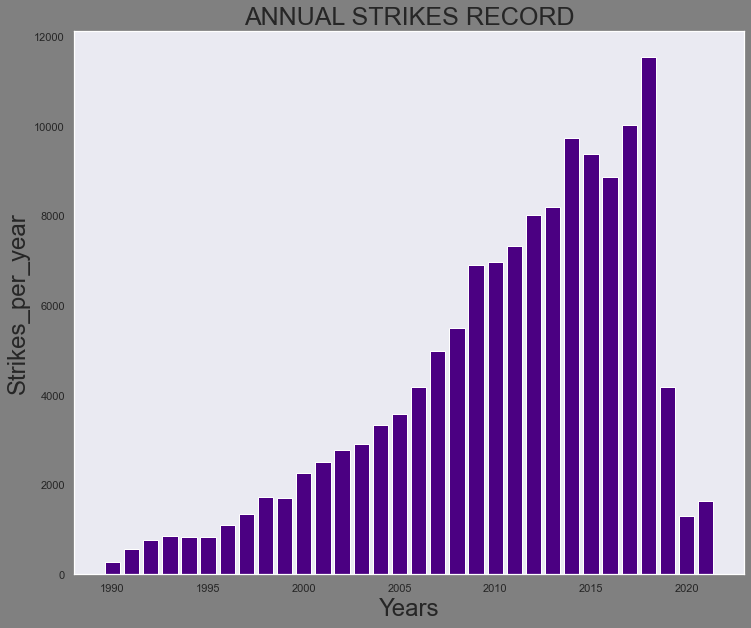

In [116]:
plt.figure(figsize=(12,10), facecolor='grey')
plt.bar(Years,Ystrikes,color='indigo') 
plt.xlabel('Years',fontsize=24)
plt.ylabel('Strikes_per_year',fontsize=24)
plt.title('ANNUAL STRIKES RECORD',fontsize=25)
plt.grid()
plt.show()

The infomation from the barchart suggets that there has been a steady increase in the number of strikes over the years with the peak strike occuring in 2018 and the strike numbers dropping considerably from 2020.
This could be as a result of the last entry being in /// which is just before the global COVID-19 pandemic that consistuted for a restriction in general movement. 

In [117]:
#COUNTING THE STRIKES PER MONTH
Strikes_per_month=Counter(df['INCIDENT_MONTH'])
Months=(list(Strikes_per_month.keys()))
Mstrikes=(list(Strikes_per_month.values()))
 


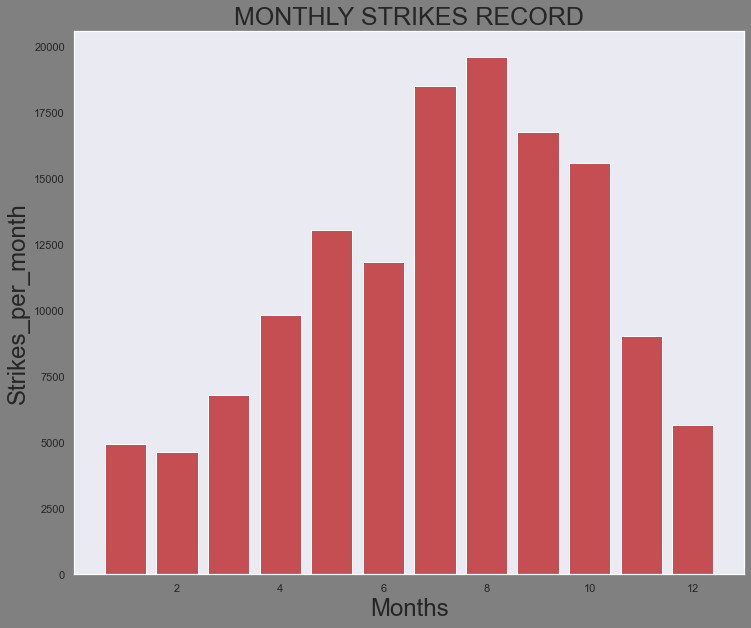

In [118]:
plt.figure(figsize=(12,10), facecolor='grey')
plt.bar(Months,Mstrikes,color='r') 
plt.xlabel('Months',fontsize=24)
plt.ylabel('Strikes_per_month',fontsize=24)
plt.title('MONTHLY STRIKES RECORD',fontsize=25)
plt.grid()
plt.show()

The barchart above shows a peak of the strikes happenning in July/August/September/October, given the region from which this data was collected which is the united states, this are typically betweeen Summer and fall seasons. 
Migration patterns suggest that August marks the beggining of fall migration and during this period a lot of the birds in this region beging flocking and gathering in groups, typically this starts in  late summer (july) and by mid August shore migration is usually at full swing.
The incident of more birds strikes as shown by this data could be an indication to expect and prepare for more bird strikes in this region at this times
.

In [119]:
# COUNTING STRIKES ACROSS TIME OF DAY 
Strikes_per_td=Counter(df['TIME_OF_DAY'])
TD=(list(Strikes_per_td.keys()))
TDstrikes=(list(Strikes_per_td.values()))

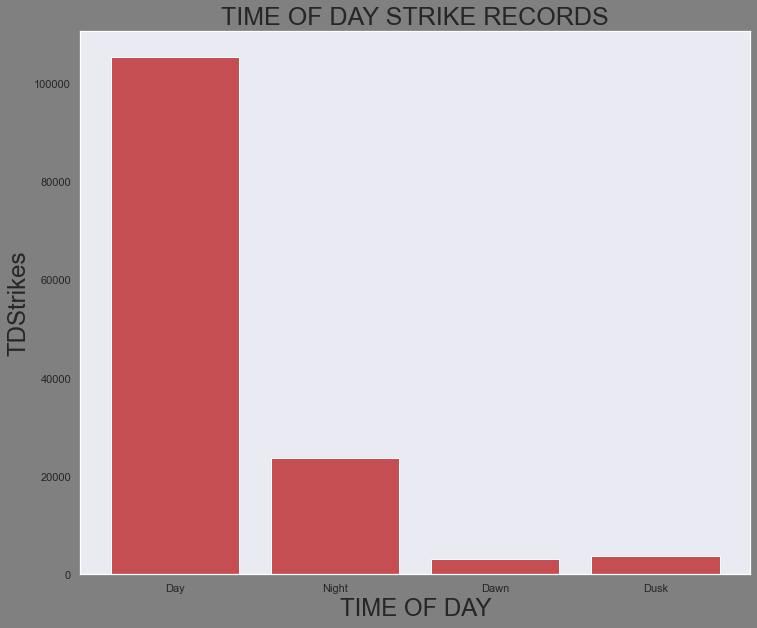

In [120]:
plt.figure(figsize=(12,10), facecolor='grey')
plt.bar(TD,TDstrikes,color='r') 
plt.xlabel('TIME OF DAY',fontsize=24)
plt.ylabel('TDStrikes',fontsize=24)
plt.title('TIME OF DAY STRIKE RECORDS',fontsize=25)
plt.grid()
plt.show()

The barchart shows that majority of the strikes occur during the day, this information might suggest that inspite of daylight the airstrikes are unavoidable, meaning the pilot may have been unable to avoid the bird traffic even if she/he sights it before hand. 


In [121]:
# COUNTING STRIKES ACROSS SEASONS 
Strikes_per_season=Counter(df['SEASONS'])
Season=(list(Strikes_per_season.keys()))
Seasonalstrikes=(list(Strikes_per_season.values()))

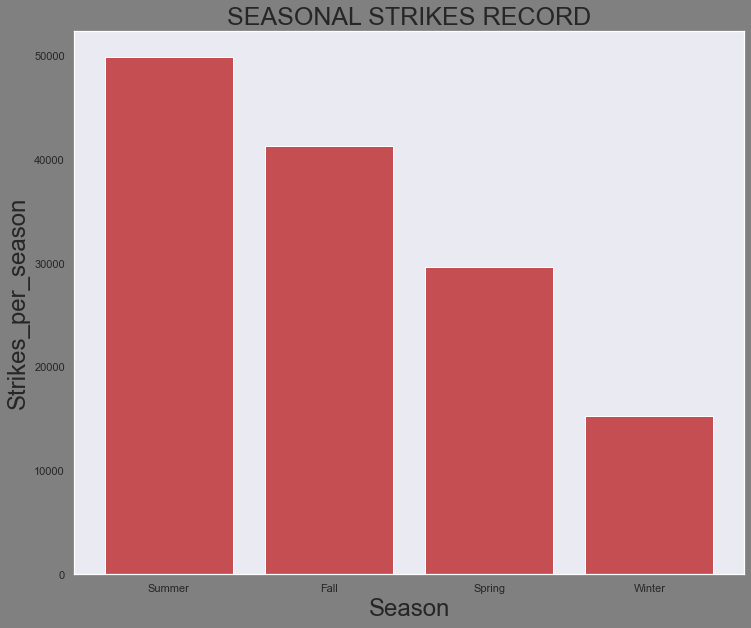

In [122]:
 plt.figure(figsize=(12,10), facecolor='grey')
plt.bar(Season,Seasonalstrikes,color='r') 
plt.xlabel('Season',fontsize=24)
plt.ylabel('Strikes_per_season',fontsize=24)
plt.title('SEASONAL STRIKES RECORD',fontsize=25)
plt.grid()
plt.show()

The barchart above shows the peak of strikes occuring at summer and dropping as it approaches winter, thjis could be related to the migration and flocking patterns of the birds. majority of the birds in this region who are not all year residents usually begin their migration in summer/fall and by winter they would have arrived at their destinations only to return in the next migration year in summer .

## INDICATED DAMAGE ANALYSIS

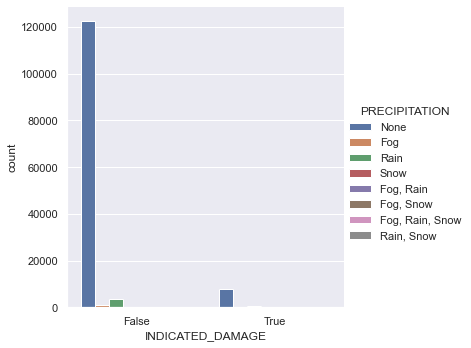

In [123]:
sns.catplot(x='INDICATED_DAMAGE',hue ='PRECIPITATION',kind ='count',data =df)

From the grouped barchart above, i see that most of the indicated damage ocured when there was 'None' i.e no special weather condition, the other instace with true values fro indicated damage is rain  

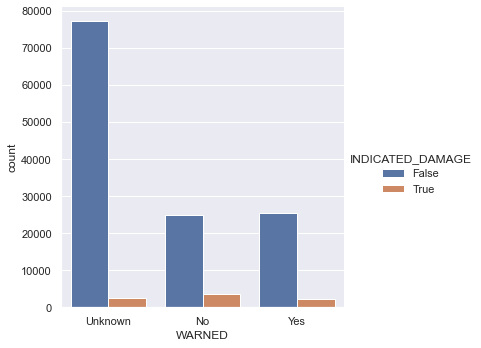

In [124]:
sns.catplot(x='WARNED',hue ='INDICATED_DAMAGE',kind ='count',data =df)

The barchart above shows that indicated damage was more when there was no prior warning about a strike this might point to the warning system being high in recall.

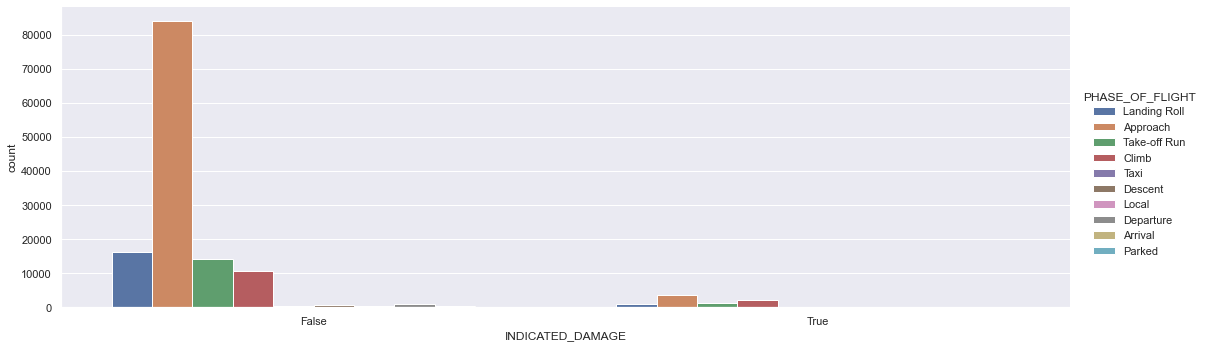

In [125]:
sns.catplot(x='INDICATED_DAMAGE',hue ='PHASE_OF_FLIGHT',kind ='count',data =df,height=5, aspect=3)

This barchart shows that the phase of flight more prone to indicated damage is 'Approach'

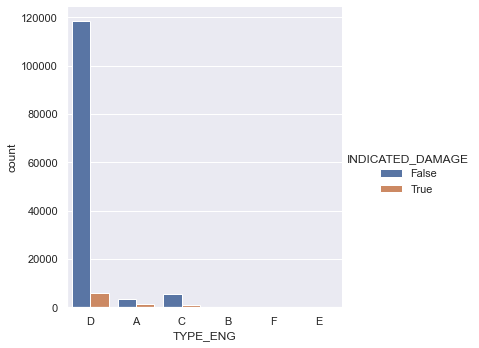

In [126]:
sns.catplot(x='TYPE_ENG',hue ='INDICATED_DAMAGE',kind ='count',data =df)

The barchart above suggests that engine type D is the most used engine type across the aircrafts.hence it carries most of the indicated damage and this makes it impossible to relate engine quality to indicated damage.Nonetheless, most of its indicated values are false, so the quality of the engine may not be in question.

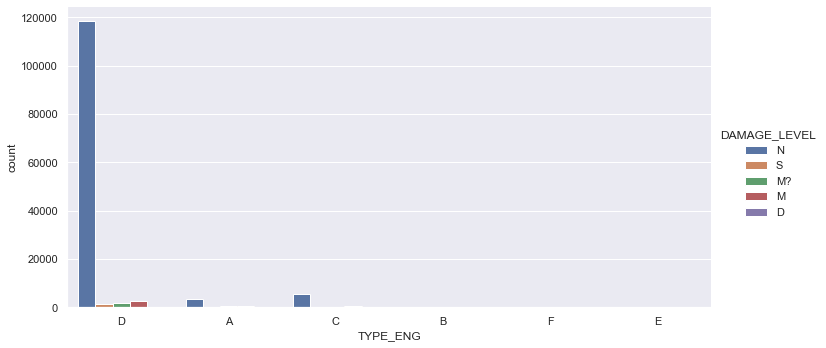

In [127]:
sns.catplot(x='TYPE_ENG',hue ='DAMAGE_LEVEL',kind ='count',data =df,height=5, aspect=2)

As earlier stated engine type D (Turbofan) is the most used for the aircrafts, it also suggestes that most of the engines incurred no damage (N), followed by a few with M(minor damage), and some with M? (minor but extent is lacking) and a few incurred S( structural damage) that could have affected the functionality of the aircraft.

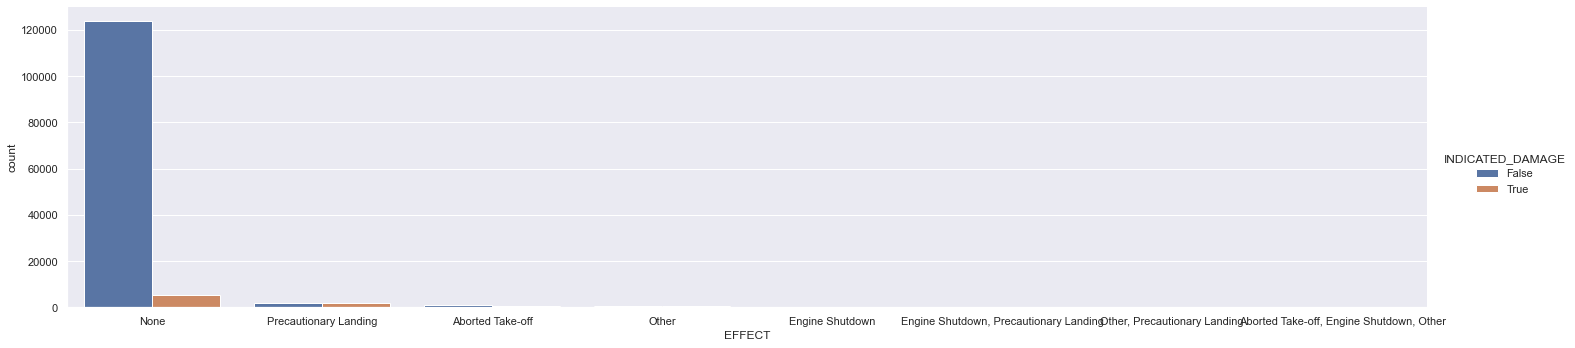

In [128]:
sns.catplot(x='EFFECT',hue ='INDICATED_DAMAGE',kind ='count',data =df,height=5, aspect=4)

This barchart shows that in cases where there was indicated damage there was no action taken and flight most likey continued and in a few cases precautionary landing was considered 

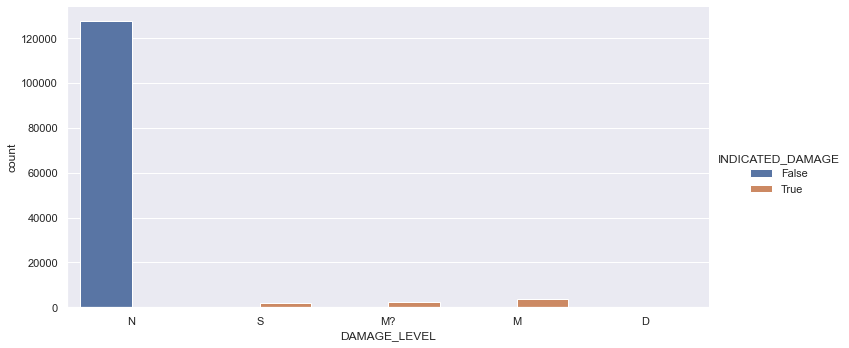

In [129]:
# DAMAGE LEVEL VS INDICATED DAMAGE 
sns.catplot(x='DAMAGE_LEVEL',hue ='INDICATED_DAMAGE',kind ='count',data =df,height=5, aspect=2)

This barchart shows that most of the indicated damage resulted in M (minor damage ), this could be an indication on the risk of flying inspite of foreknowledge of a possible bird strike 

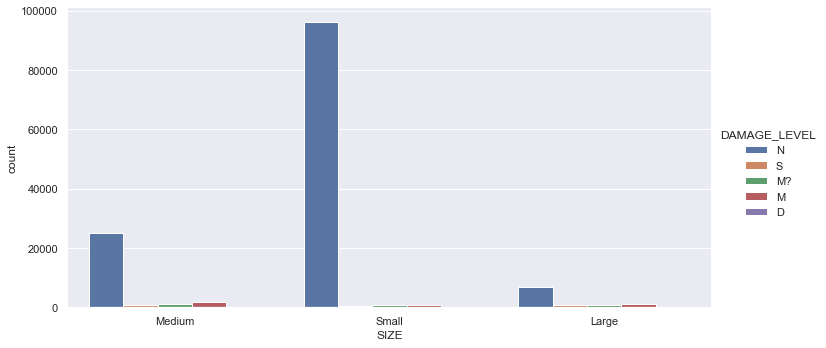

In [130]:
sns.catplot(x='SIZE',hue ='DAMAGE_LEVEL',kind ='count',data =df,height=5, aspect=2)

The barchart above shows most of the structural damage S was caused by Large/Multiple birds and in some cases the type of damage caused was not relative to the size of the bird.

# RISK ANALYSIS

In [138]:
risky=Counter(df['RISK'])
RiskLevel=(list(risky.keys()))
RiskCount=(list(risky.values()))

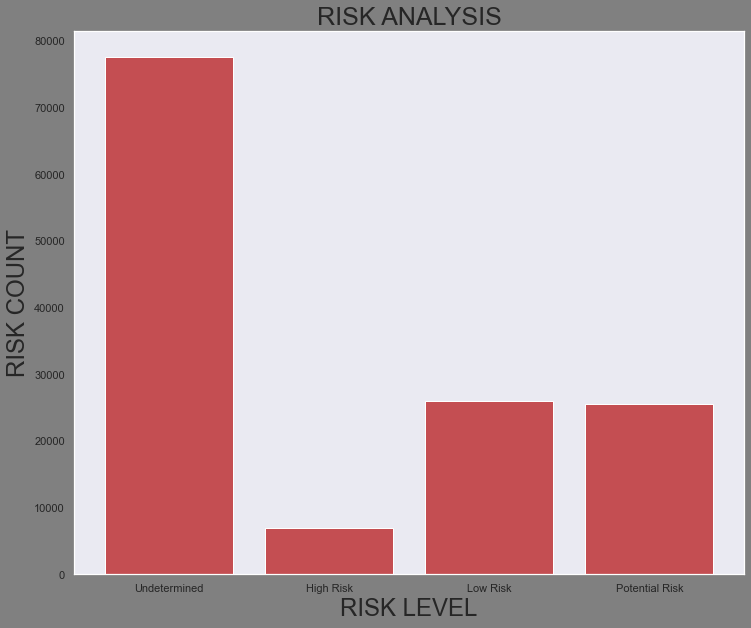

In [139]:
plt.figure(figsize=(12,10), facecolor='grey')
plt.bar(RiskLevel,RiskCount,color='r') 
plt.xlabel('RISK LEVEL',fontsize=24)
plt.ylabel('RISK COUNT',fontsize=24)
plt.title('RISK ANALYSIS',fontsize=25)
plt.grid()
plt.show()

The bar chart above shows the risk count and it reveals that only a few of the incidents were highrisk, however since the dataset is skewed towards 'False' indicated damage this is not a reliable information in a general situation.

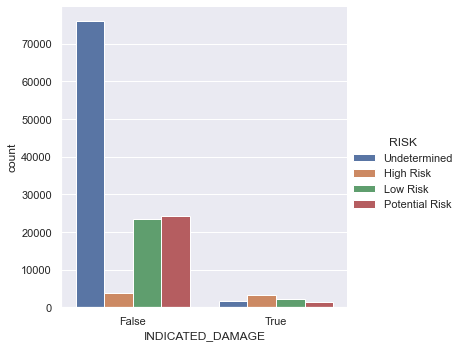

In [134]:
sns.catplot(x='INDICATED_DAMAGE',hue ='RISK',kind ='count',data =df)

The barchart above shows that in cases where there was indicated damage majority of the time it was a High risk situation, this speaks to the relevance of the model, showing that indicated damage may be an important indicator for avoiding casualities caused by birdstrikes


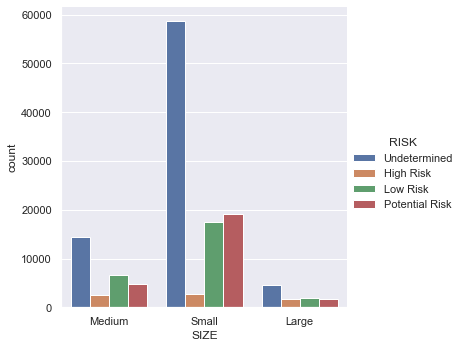

In [136]:
sns.catplot(x='SIZE',hue ='RISK',kind ='count',data =df)

The barchart above shows that risk is fairly distributed across all bird sizes and regardless of bird size all the levels of risks can be observed


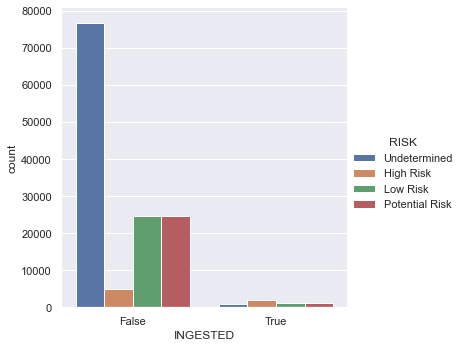

In [140]:
sns.catplot(x='INGESTED',hue ='RISK',kind ='count',data =df)

This barchart shows that in cases where the birds were not ingested thr risk was higher, however, the risk persists irrespective of if the bird was ingested or not during a hit 